# Shack Labs Project 1 writeup .

### Predicting housing prices ###

In [228]:
#importing the necessary libraries to complete the assignment 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [168]:
# Reading the dataset 
df = pd.read_csv("DS - Assignment Part 1 data set.csv")

In [169]:
# analysis of the DS 
df.head()


,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [170]:
df.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
House Age                                   414 non-null float64
Distance from nearest Metro station (km)    414 non-null float64
Number of convenience stores                414 non-null int64
latitude                                    414 non-null float64
longitude                                   414 non-null float64
Number of bedrooms                          414 non-null int64
House size (sqft)                           414 non-null int64
House price of unit area                    414 non-null float64
Total Value                                 414 non-null float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [171]:
# To check if there are any null values in any of the column.
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [172]:
# observation from the data set 
# transaction date dose not look proper ,we can extract year out of it by converting the column Datatype to Date but it seems
# transaction date might not contribute much to the overall prediction ,hence can be dropped. 
df.drop('Transaction date',axis = 1,inplace=True)  # dropping the Transaction date column 


In [173]:
# unit area value is given hence create a new column to calculate the final price of the house in Dataset 
df['Total Value'] = df['House size (sqft)'] * df['House price of unit area']

In [174]:
df.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Total Value
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,21792.5
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,52328.0
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,50138.0
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,47950.0
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,21162.1


In [175]:
df.corr() 

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Total Value
House Age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567,-0.198741
Distance from nearest Metro station (km),0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613,-0.441094
Number of convenience stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005,0.381169
latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307,0.378440
longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287,0.346538
Number of bedrooms,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265,0.548679
House size (sqft),-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489,0.702782
House price of unit area,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000,0.698585
Total Value,-0.198741,-0.441094,0.381169,0.378440,0.346538,0.548679,0.702782,0.698585,1.000000


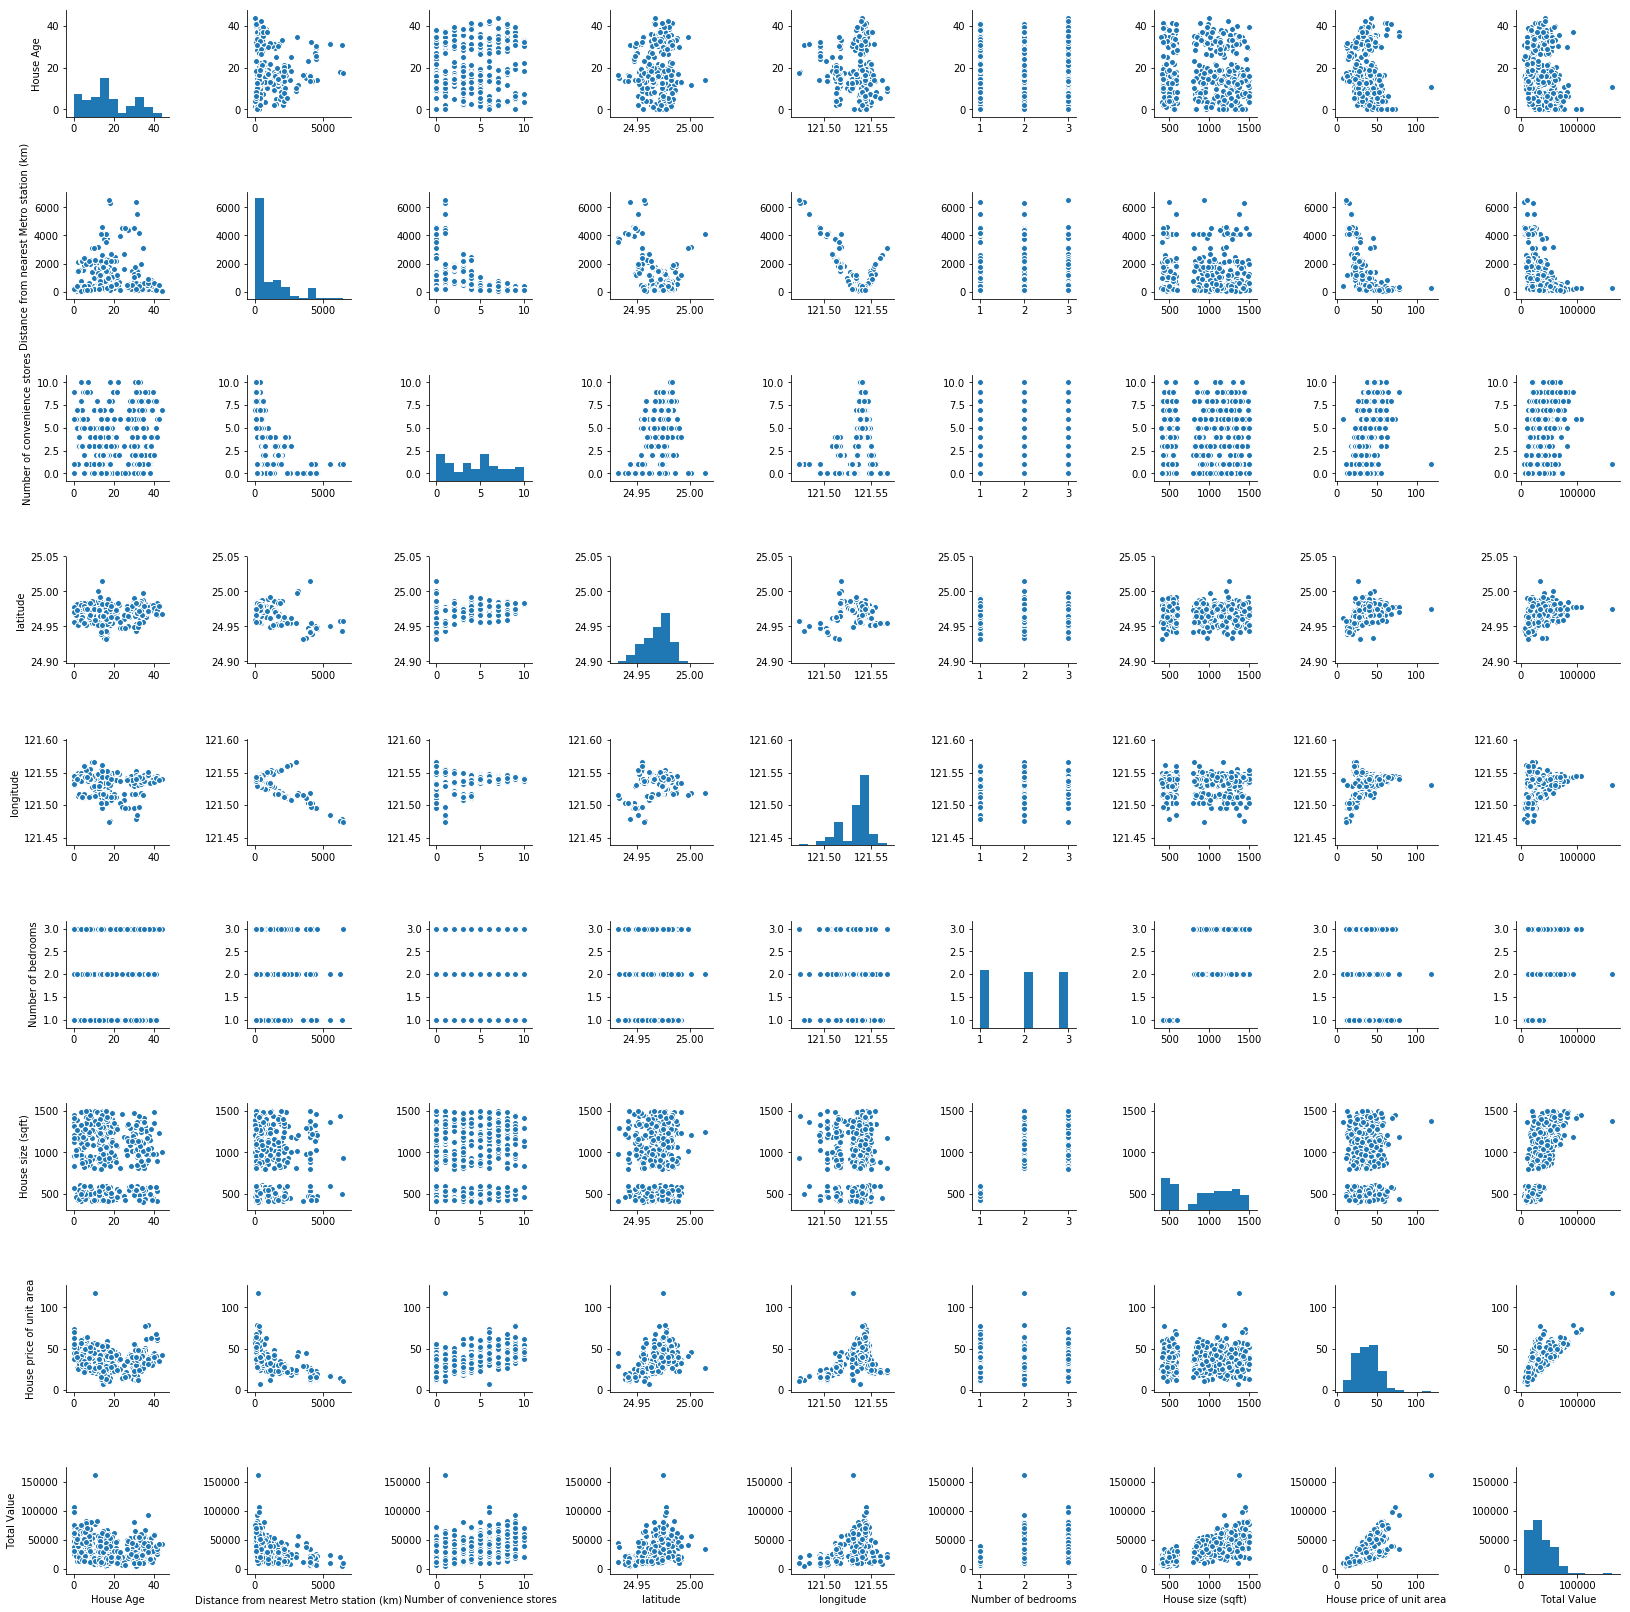

In [176]:
sns.pairplot(df)
plt.show()

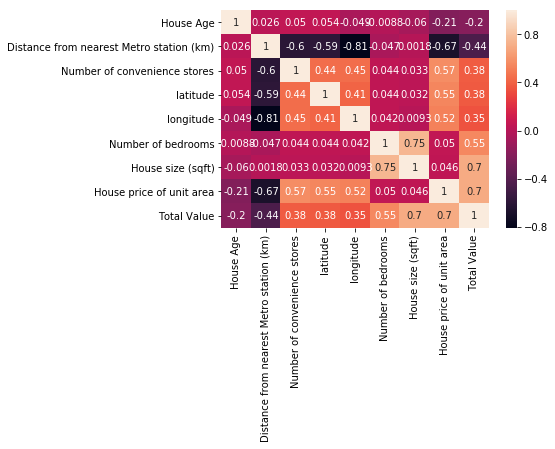

In [177]:
#using coorelation as measure between Various input features and prediction values to consider the same for the model 
sns.heatmap(df.corr(),annot=True,cmap ='Blues')
plt.show()

### Model features consideration ###

In [178]:

# As mentioned before Coorelation helps to determine if there is a strong relationship exist between input feature and prediction 
# from the above graph there are two observations

#1 . Considering House price of unit area only there are three input features which are worth looking 
# a . Number of convenience store ,b.Latitude ,c.Longitude
# however if we use total value as parameter latitutde and longitude fares less compare to number of bedrooms and house size . For 
# we would all 5 as our input feature 
#input feature
#a.Number of convenience store
#b.Latitude 
#c.Longitude
#d.Number of bedrooms
#.House size 


### Training a Linear Regression Model ###

In [179]:
X = df[['Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)']]
y = df['Total Value']

## Split the data set ##

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

## Creating and Training the Model ##

In [182]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Prediction from model

In [183]:
predictions = lm.predict(X_test)

In [184]:
print(lm.coef_)

[  1.14723405e+03   3.39937989e+05   2.15618442e+05  -1.06143766e+03
   4.14746935e+01]


In [211]:
lm.score(X_train,y_train),lm.score(X_test,y_test)

(0.66806464830962342, 0.7257826199999865)

Text(0,0.5,'Predictions')

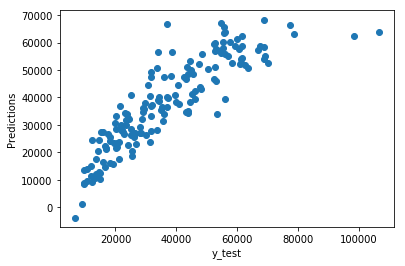

In [189]:
plt.scatter(y_test,predictions)
#plt.plot(X_test,predictions,c='r')
plt.xlabel("y_test")
plt.ylabel("Predictions")

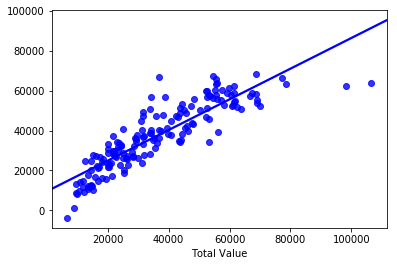

In [190]:
sns.regplot(x=y_test,y=predictions,ci=None,color ='blue');

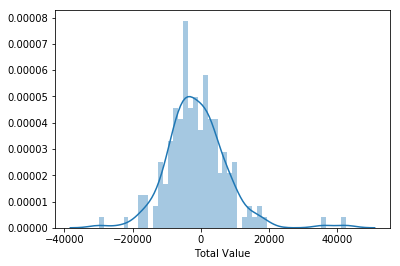

In [191]:
sns.distplot((y_test-predictions),bins=50);

### Regression Evaluation Metrics

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:
Mean Squared Error (MSE) is the mean of the squared errors:
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:


In [192]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6654.35223039
MSE: 81450548.3974
RMSE: 9024.99575609


R-squared we can use to measure the performance of our regression model. It represents 
how close the data points are to the regression line. The higher the R-squared value, the better the model fits your data. 
The best possible score is 1.0 and it can be negative as well .

In [193]:
from sklearn.metrics import r2_score

In [194]:
print("R2-score: %.2f" % r2_score(y_test , predictions) )

R2-score: 0.77


In [195]:
# Below is the dataset to compare the observation and prediction result side by side . 
dataset = {'Observation':y_test,'Result':predictions}
result_dataset = pd.DataFrame(data=dataset)
result_dataset.head(10)

,Observation,Result
121,21264.0,17413.690971
353,28201.3,27029.808413
96,68901.0,53890.282132
43,15242.7,27533.727099
125,46267.2,39559.448561
204,29260.0,35898.991818
235,40675.5,44716.546827
358,46047.1,42421.202415
379,98277.0,62276.525206
169,31537.0,49250.301510


In [196]:
## oberservation from the prediction and model metric evaluations 
# The simple linear or multiple regression is always a goto method to first deploy and check model accuracy,predictions etc. From the scatter 
#plot it looks like straight line nught not fit all and the R2 score can also be improved . 
# Steps to take 
# since there are multiple features we could also try polynomial regression to understand if the prediction
# error can be improved  i.e. better R2 score. 

### Polynomial regression deploy

In [197]:
X = df[['Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)']]
y = df['Total Value']

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [199]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4) # going with 4 degree since there are 4 input features.
train_x_poly = poly.fit_transform(X_train)
train_x_poly

array([[  1.00000000e+00,   4.00000000e+00,   2.49783800e+01, ...,
          2.22784000e+05,   1.05154048e+08,   4.96327107e+10],
       [  1.00000000e+00,   0.00000000e+00,   2.49630500e+01, ...,
          1.68100000e+05,   6.89210000e+07,   2.82576100e+10],
       [  1.00000000e+00,   4.00000000e+00,   2.49742500e+01, ...,
          3.06950400e+06,   1.34444275e+09,   5.88865925e+11],
       ..., 
       [  1.00000000e+00,   0.00000000e+00,   2.49388500e+01, ...,
          1.31116410e+07,   5.27525023e+09,   2.12240901e+12],
       [  1.00000000e+00,   3.00000000e+00,   2.49756300e+01, ...,
          6.76520100e+06,   1.95514309e+09,   5.65036353e+11],
       [  1.00000000e+00,   9.00000000e+00,   2.49743300e+01, ...,
          6.38067600e+06,   1.79084306e+09,   5.02629953e+11]])

In [200]:
from sklearn.linear_model import LinearRegression
lm2 = LinearRegression()
lm2.fit(train_x_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [201]:
test_x_poly = poly.transform(X_test)
test_y_poly = lm2.predict(test_x_poly)

In [208]:
lm2.score(train_x_poly,y_train)

0.57504225837637102

In [206]:
lm2.score(test_x_poly,test_y_poly)

1.0

Text(0,0.5,'y_poly')

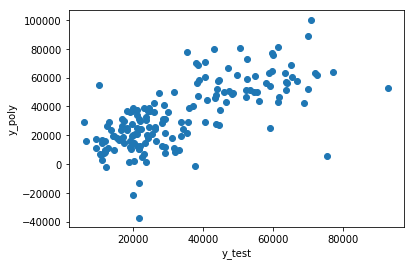

In [203]:
plt.scatter(y_test,test_y_poly)
#plt.plot(X_test,test_y_poly,c='r')
plt.xlabel("y_test")
plt.ylabel("y_poly")

In [204]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('MAE:', metrics.mean_absolute_error(y_test, test_y_poly))
print('MSE:', metrics.mean_squared_error(y_test, test_y_poly))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_y_poly)))

MAE: 12144.3979416
MSE: 272203111.595
RMSE: 16498.5790781


In [209]:
print("R2-score: %.2f" % r2_score(y_test , test_y_poly) )

R2-score: 0.20


With the help of R2 score we can determine that Multiple regression is giving better result compare to polynomial regression .We can now relook into the feature of the dataset to better the performance with the help of multiple regression .

#### Model recaliberation 

Idea here is now to use Backward elimination methond by using OLS method in Statsmodel . The Statistical significant value we are
trying to determine here which we can keep in the model and then to find the insignificant attributes or features we can drop
without effecting the R2 . 

Below is where we call the stats model library . 

In [248]:
X = df[['Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)']]
y = df['Total Value']

In [249]:
import statsmodels.formula.api as sm 
#np.append(arr = np.ones((414,1)).astype(int), values = X, axis = 1)

In [250]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()

In [ ]:
The result here is to check the Alpha value which we are keeping as .05 if it is greater or lower than the pvalue . 
If the value is greater than p value we can drop those attributes since those are statistically insignificant . 

In [251]:
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            Total Value   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     911.8
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          3.33e-219
Time:                        18:11:23   Log-Likelihood:                -4465.4
No. Observations:                 414   AIC:                             8941.
Df Residuals:                     409   BIC:                             8961.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Number of conven

In [ ]:
From the above model it looks like only number of bedrooms column is slightly ahead of its p value . I believe we can 
try optimizing the model by dropping the same . 

In [212]:
#input feature
#a.Number of convenience store
#b.Latitude    
#c.Longitude    
#.House size 

In [252]:
X = df[['Number of convenience stores', 'latitude', 'longitude',
        'House size (sqft)']]

y = df['Total Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

from sklearn.linear_model import LinearRegression
lm3 = LinearRegression()
lm3.fit(X_train,y_train)

predictions = lm3.predict(X_test)

Text(0,0.5,'Predictions')

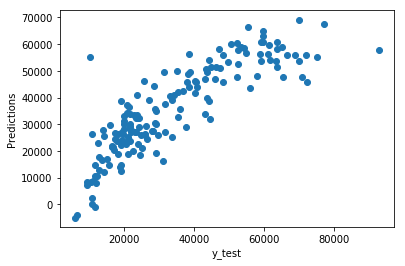

In [253]:
plt.scatter(y_test,predictions)
plt.xlabel("y_test")
plt.ylabel("Predictions")

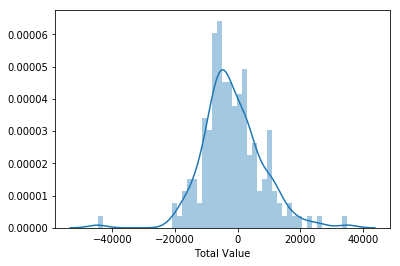

In [254]:
sns.distplot((y_test-predictions),bins=50);

In [255]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

from sklearn.metrics import r2_score

MAE: 7424.28386245
MSE: 94159834.2076
RMSE: 9703.59903374


In [256]:
print("R2-score: %.2f" % r2_score(y_test , predictions) )

R2-score: 0.72


In [257]:
# Below is the dataset to compare the observation and prediction result side by side . 
dataset = {'Observation':y_test,'Result':predictions}
result_dataset = pd.DataFrame(data=dataset)
result_dataset.head(10)

,Observation,Result
356,19207.2,12443.583708
170,21052.8,37109.410483
224,40480.0,41527.661243
331,6645.6,-4181.853634
306,65511.0,47517.437145
325,44424.6,54011.589342
150,26190.0,26129.622595
10,19292.4,14697.813359
21,77193.6,67498.301194
268,33844.4,39203.988210


Considering the R2 it seem the orignal model with the below feature and value of .77 is the best we can come up with the said dataset..Hence to conclude multiple regression model with the below feature is our best bet . 


#input feature
#a.Number of convenience store
#b.Latitude 
#c.Longitude
#d.Number of bedrooms
#.House size 